In [19]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms 
import pandas as pd
import PIL
import numpy as np 
import matplotlib.pyplot as plt
from easyimages import EasyImageList
from torch import nn
import torch
from sklearn.metrics import accuracy_score, classification_report, log_loss
import torch.nn.functional as F
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

### Define the new dataset

Keep in mind we are inheriting the Dataset base-class. And we have to override 2 methods:
 - \____len____
 - \____getitem____

1. load_image_and_target reads the data from the csv file and converts the image array into a PIL object - this is not mandatory but useful, as many handy functions like transform, operate on PIL.Images
2. getitem, takes a index and it should properly return for every number between (0, and len)
3. len should return the number of samples (images) in your dataset

In [20]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}

class FashionMnist(Dataset):

    def __len__(self):
        return len(self.metadata_df)

    def __init__(self, metadata_df,
                 transform=None):
        
        self.metadata_df = metadata_df.copy()
        self.transform = transform
        
    def __getitem__(self, index):
        X, y = self.load_image_and_target(index)
        # We can transform the output images here, cast to torch data-format and/or do augmentations
        X = self.transform(X)
            
        return X, y
    
    def load_image_and_target(self,index):
        # .iloc is short for integer loc it returns a row of data based on its ored not index-value(if not the same)
        oneimage = self.metadata_df.iloc[index]
        image, y = PIL.Image.fromarray(
            np.array(oneimage[1:]).reshape(28, 28).astype('uint8'), 'L'), oneimage[0]
        
        return image, y
    
    def _load_image_metadata(self, index):
        
        image_path = df.iloc[index]
        
        image = PIL.Image.open(image_path)
        meta_data = image.meta_data
        
        image, metada 
        


    def collate_func(self, batch):
        pass


    
PATH_TO_FMNIST_TRAIN = '/media/i008/ssd500/fashion-mnist_train.csv'
PATH_TO_FMNIST_TEST = '/media/i008/ssd500/fashion-mnist_test.csv'

    
dftrain = pd.read_csv(PATH_TO_FMNIST_TRAIN).sample(frac=1)
dftest = pd.read_csv(PATH_TO_FMNIST_TEST).sample(frac=1)

transform_train = transforms.Compose([transforms.ToTensor()])
fmnist_train = FashionMnist(dftrain, transform=transform_train)

transform_test = transforms.Compose([transforms.ToTensor()])
fmnist_test = FashionMnist(dftest, transform=transform_test)

In [21]:
totensor  = transforms.ToTensor()

In [22]:
X, y = fmnist_test[0]
X.shape

torch.Size([1, 28, 28])

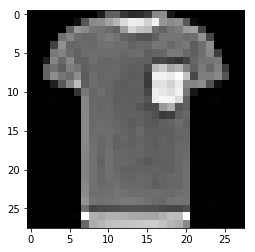

In [32]:
one_sample_image = dftrain.iloc[30].tolist()
label, image =  one_sample_image[0], one_sample_image[1:]
label
im = np.array(image).reshape((28, 28))
plt.imshow(im, cmap='gray')


### our datasets supports getitem wich means we can do:

In [33]:
image, label = fmnist_train[0]
print(type(image))
print(type(label), label)

image, label = fmnist_train.load_image_and_target(0)
print(type(image), image)

<class 'torch.Tensor'>
<class 'numpy.int64'> 8
<class 'PIL.Image.Image'> <PIL.Image.Image image mode=L size=28x28 at 0x7FF1584E3828>


In [67]:
fmnist_dl = DataLoader(fmnist_train, batch_size=32, num_workers=2)
batch_iterator = iter(fmnist_dl)
X, y = next(batch_iterator)

for batch in fmnist_dl:
    break
for batch in fmnist_dl:
    break
    
print("y:",batch[1].shape)
print("X: ", batch[0].shape)




y: torch.Size([32])
X:  torch.Size([32, 1, 28, 28])


In [72]:
batch[0].shape

torch.Size([32, 1, 28, 28])

### Explore your dataset
Its always good to start with getting some inside about your dataset. Thats usuall much easier and less important in image datasets - but it does not mean you should not do it.

Things you should always think about working with an image dataset are:
- Check target distribiution (counts) do you see a strong imbalance?
- Check sizes of images, if not all images are of the same size you might destroy your data with wrong transformations
 

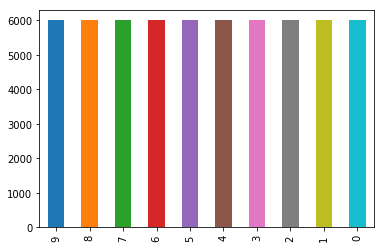

In [30]:
dftrain.label.value_counts().plot(kind='bar')

### visualize a batch
Its always a good idea to sanity check the output of our loaders

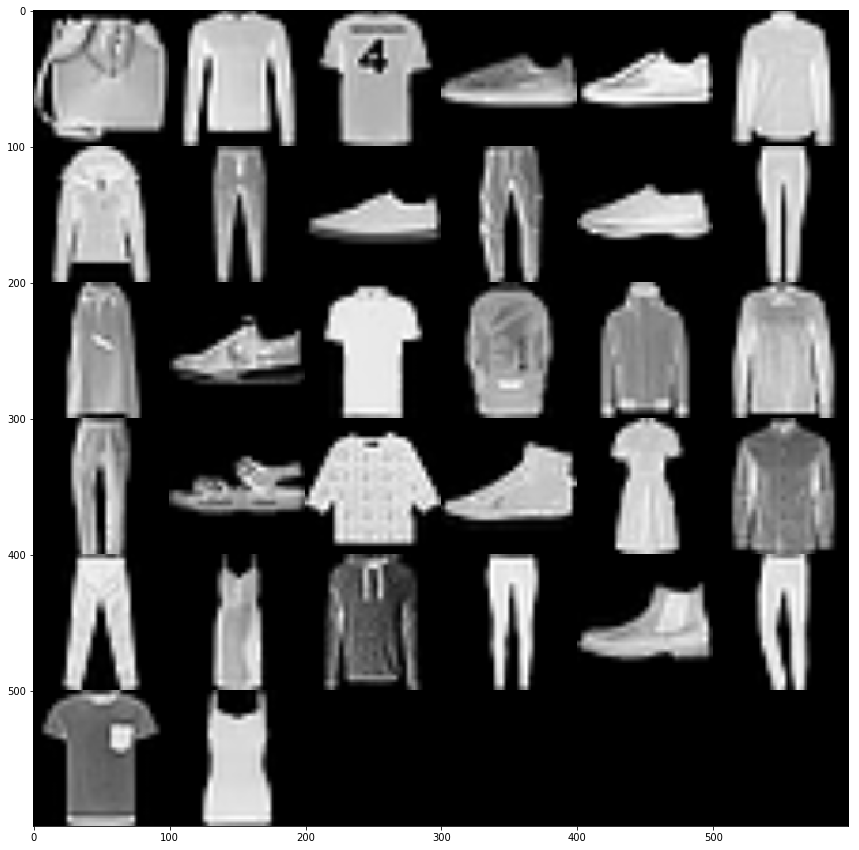

In [31]:
im = EasyImageList.from_torch_batch(X.repeat(1,3,1,1), # we need to add 3 channels to the images
                                    mean=None, 
                                    std=None)
im.numpy_grid()

### Define your model architecture
As a baseline model dont  overcomplicate, either use some very simple architecture or go with something well established like resnet. There will be time to go more fancy

Here we define a model with two CONV blocks comprising of a typical:  
*Conv>BN>RELU>POOL* setting

In [49]:
class SimpleCNN(nn.Module):
    def __init__(self, num_of_class):
        super(SimpleCNN, self).__init__()
    
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            nn.Dropout2d(p=0.5)        
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        # we reduce the volume shape 2 times (2 Pooling Operations)
        sle.fc1 = nn.Lie
        

        self.fc = nn.Linear(int(28/2/2) * int(28/2/2) * 32, num_of_class)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc(out)
        return out
    
    


In [64]:
# Always check your model are you atleasy able to make a forward pass and shapes match your expectations?
image = torch.randn(32, 1, 28, 28)
cnn = SimpleCNN(10)
# out_layer2 = cnn.layer2(cnn.layer1(image))
# out_layer2.reshape(out_layer2.size(0), -1).shape
# output = cnn(image)
print("input shape:")
print(image.shape)
print("output shape:")
print(output.shape)



input shape:
torch.Size([32, 1, 28, 28])
output shape:
torch.Size([32, 10])


tensor([3, 2, 2, 0, 2, 4, 8, 3, 8, 1, 8, 2, 0, 5, 2, 1, 2, 8, 0, 3, 0, 2, 1, 1,
        3, 8, 2, 2, 2, 8, 1, 0])

### Define your loss function / crieterion and optimizer
Its a good idea to create some dummy data and pass it trough the cost function to make sure you uderstand what the shapes shoudl be

In case of CrossEntropyLosss We want our predictions to be of shape (BATCH_SIZE, N_CLASSES) and y_true of shape (BS) 
(Basically a vector of number that corespond to the class) 


In [66]:
LR= 0.001
BATCH_SIZE = 256
DATASET_USAGE_SIZE = 0.05

# MEAN = [0.485, 0.456, 0.406]
# STD = [0.229, 0.224, 0.225]
RESIZE = 28

cnn = SimpleCNN(10)

OPTIMIZER = 'Adam' # one of ['ASGD','Adadelta', 'Adagrad','Adam', 'Adamax','LBFGS', 'RMSprop','Rprop','SGD',SparseAdam']
optimizer = getattr(torch.optim, OPTIMIZER)(cnn.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()

cnn.to(DEVICE)

# Create dataset loaders

dftrain = pd.read_csv(PATH_TO_FMNIST_TRAIN).sample(frac=DATASET_USAGE_SIZE)
dftest = pd.read_csv(PATH_TO_FMNIST_TEST).sample(frac=0.1)

transform_train = transforms.Compose([transforms.Resize(RESIZE), transforms.ToTensor()])
fmnist_train = FashionMnist(dftrain, transform=transform_train)

transform_test = transforms.Compose([transforms.Resize(RESIZE), transforms.ToTensor()])
fmnist_test = FashionMnist(dftest, transform=transform_test)

fmnist_train_dl = DataLoader(fmnist_train, batch_size=BATCH_SIZE)
fmnist_test_dl = DataLoader(fmnist_test, batch_size=BATCH_SIZE)

# Lets try to use the criterion with dummy data
yp = torch.randn(BATCH_SIZE, 10)
yt = torch.randint(10, (BATCH_SIZE,))
criterion(yp, yt.long())

# print(len(fmnist_train_dl))
# print(len(dftrain))


tensor([3, 1, 9, 0, 2, 5, 0, 5, 9, 7, 9, 1, 7, 9, 7, 3, 4, 2, 9, 5, 1, 6, 1, 9,
        8, 0, 6, 1, 3, 1, 9, 6, 7, 9, 3, 7, 6, 2, 6, 7, 6, 1, 7, 9, 2, 9, 5, 6,
        7, 0, 1, 4, 8, 4, 6, 5, 6, 8, 7, 5, 3, 3, 5, 6, 8, 2, 8, 3, 2, 0, 7, 1,
        4, 7, 8, 1, 9, 7, 0, 8, 2, 7, 5, 7, 0, 6, 1, 6, 8, 9, 6, 1, 3, 4, 0, 3,
        2, 3, 9, 0, 1, 3, 5, 2, 3, 2, 6, 2, 0, 9, 4, 6, 7, 7, 2, 6, 1, 1, 9, 5,
        5, 8, 4, 9, 8, 2, 9, 9, 7, 1, 2, 6, 9, 1, 5, 3, 5, 1, 7, 6, 2, 4, 2, 9,
        7, 6, 1, 8, 2, 3, 0, 4, 3, 1, 5, 2, 8, 5, 6, 7, 7, 4, 6, 1, 6, 6, 0, 8,
        3, 2, 6, 8, 7, 3, 8, 2, 9, 2, 5, 8, 9, 9, 0, 1, 8, 1, 5, 2, 8, 0, 6, 6,
        9, 0, 3, 8, 2, 4, 9, 7, 6, 2, 2, 1, 2, 1, 8, 3, 5, 4, 8, 0, 2, 4, 7, 5,
        8, 6, 3, 1, 2, 9, 5, 9, 1, 6, 5, 6, 7, 4, 8, 5, 1, 3, 0, 0, 5, 3, 2, 6,
        0, 8, 0, 2, 8, 9, 2, 7, 1, 6, 8, 7, 0, 1, 9, 1])

In [73]:
def process_train_batch(batch):
    X, y = batch
    return X.to(DEVICE), y.to(DEVICE)

def process_eval_batch(batch):
    X, y = batch
    X = X.to(DEVICE)
    y = y.to(DEVICE).detach().cpu().numpy()   
    return X, y 

def evaluate_model(model, test_loader, print_info=False):
    with torch.no_grad():
        model.eval()
        collect_results = []
        collect_target = []
        for batch in test_loader:
            X, y = process_eval_batch(batch)
            pred = model(X)
            collect_results.append(F.softmax(pred).detach().cpu().numpy())
            collect_target.append(y) 
    
        preds_proba = np.concatenate(collect_results)
        preds = preds_proba.argmax(axis=1)

        targets = np.concatenate(collect_target)
        
        ll = log_loss(targets, preds_proba)
        acc = accuracy_score(targets, preds)
        if print_info:
            print("test log-loss: {}".format(ll))
            print("overall accuracy:  {}".format(ac))
            #print(classification_report(targets, preds))
        model.train()
        return ll, acc
    
               
collect_metrics = []
collect_loss = []
for epoch in range(50):
    lossacc = 0
    for i, batch in enumerate(fmnist_train_dl):
        optimizer.zero_grad()
        X, y = process_train_batch(batch)
        y_pred = cnn(X)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()  
        collect_loss.append(float(loss.detach().cpu().numpy()))  
        
    lltest, acctest = evaluate_model(cnn, fmnist_test_dl)
    lltrain, acctrain = evaluate_model(cnn, fmnist_train_dl)
    collect_metrics.append([lltest, lltrain, acctest, acctrain])
    print("test: loss: {}  acc: {}".format(lltest, acctest))
    print("train: loss: {}  acc: {}".format(lltrain, acctrain))



/home/i008/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


test: loss: 1.9984827897548676  acc: 0.56
train: loss: 2.0048625410397847  acc: 0.5336666666666666
test: loss: 1.3672171412110328  acc: 0.726
train: loss: 1.387799442489942  acc: 0.7036666666666667
test: loss: 0.7985415318273008  acc: 0.766
train: loss: 0.8239145921592911  acc: 0.754
test: loss: 0.5732008734059054  acc: 0.796
train: loss: 0.5859292103246941  acc: 0.7893333333333333
test: loss: 0.49417718968394914  acc: 0.823
train: loss: 0.4930724722035229  acc: 0.8256666666666667
test: loss: 0.4564504131972935  acc: 0.839
train: loss: 0.44323752317679466  acc: 0.843
test: loss: 0.4348670036917101  acc: 0.84
train: loss: 0.4107479247779799  acc: 0.8483333333333334
test: loss: 0.4192144048176415  acc: 0.841
train: loss: 0.38497510865417767  acc: 0.8603333333333333
test: loss: 0.4074752985984996  acc: 0.84
train: loss: 0.3626237129133297  acc: 0.867
test: loss: 0.39522681333392573  acc: 0.848
train: loss: 0.34055214971874376  acc: 0.8793333333333333
test: loss: 0.38626326788681037  acc: 

<Figure size 432x288 with 0 Axes>

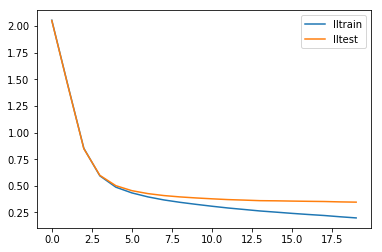

<Figure size 432x288 with 0 Axes>

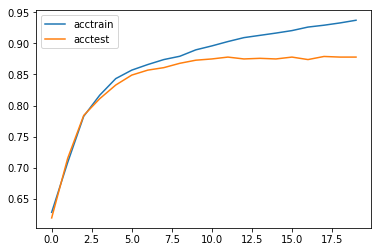

In [49]:
columns = ['lltest', 'lltrain', 'acctest', 'acctrain']

metrics_df = pd.DataFrame(collect_metrics, columns=columns)
plt.figure()
metrics_df[['lltrain','lltest']].plot()
plt.figure()
metrics_df[['acctrain','acctest']].plot()

### Questions/Exercises
- why do we use torch.no_grad():
- Try changing the kernel size of the CNN's what is your intuition should we use a smaller or bigger kernel?
- Get the output of the first cnn, look at its shape and how it looks
- Add dropout to the network, where does it make sense? To put it


# Crude LR-finder implementation